#### install.packages("readxl",dependencies= TRUE)
install.packages("ggrepel")
install.packages("gridExtra")

In [2]:
library(readxl)
library(tidyverse)
library(readxl)
library(readr)
library(magrittr)
library(purrr)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.3     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘magrittr’


The following object is masked from ‘package:purrr’:

    set_names


The following object is masked from ‘package:tidyr’:

    extract




In [3]:
library(glue)
library(stringr)
library(ggplot2)
library(xml2)

In [4]:
library(rvest)
library(png)
library(gridExtra)
library(dplyr)
library(ggrepel)
library(forcats)
library(scales)


Attaching package: ‘rvest’


The following object is masked from ‘package:readr’:

    guess_encoding



Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine



Attaching package: ‘scales’


The following object is masked from ‘package:purrr’:

    discard


The following object is masked from ‘package:readr’:

    col_factor




#### "/home/mathuser/overseas-merchandise-trade-june-2020.xlsx" %>% read_excel() %>% glimpse()

In [6]:
June_year_ended <- read_excel('datafin.xlsx',sheet=4)

In [7]:
June_year_ended<-as.data.frame(June_year_ended)

In [8]:
print(June_year_ended)

   YearEndedJune        Type Valuesinmillion
1           2010 Export(fob)           40669
2           2010 Import(cif)           40079
3           2011 Export(fob)           46072
4           2011 Import(cif)           45073
5           2012 Export(fob)           46688
6           2012 Import(cif)           47451
7           2013 Export(fob)           45704
8           2013 Import(cif)           46524
9           2014 Export(fob)           51161
10          2014 Import(cif)           49972
11          2015 Export(fob)           48396
12          2015 Import(cif)           51371
13          2016 Export(fob)           49325
14          2016 Import(cif)           52660
15          2017 Export(fob)           49873
16          2017 Import(cif)           53530
17          2018 Export(fob)           55490
18          2018 Import(cif)           59696
19          2019 Export(fob)           59378
20          2019 Import(cif)           64366
21          2020 Export(fob)           60201
22        

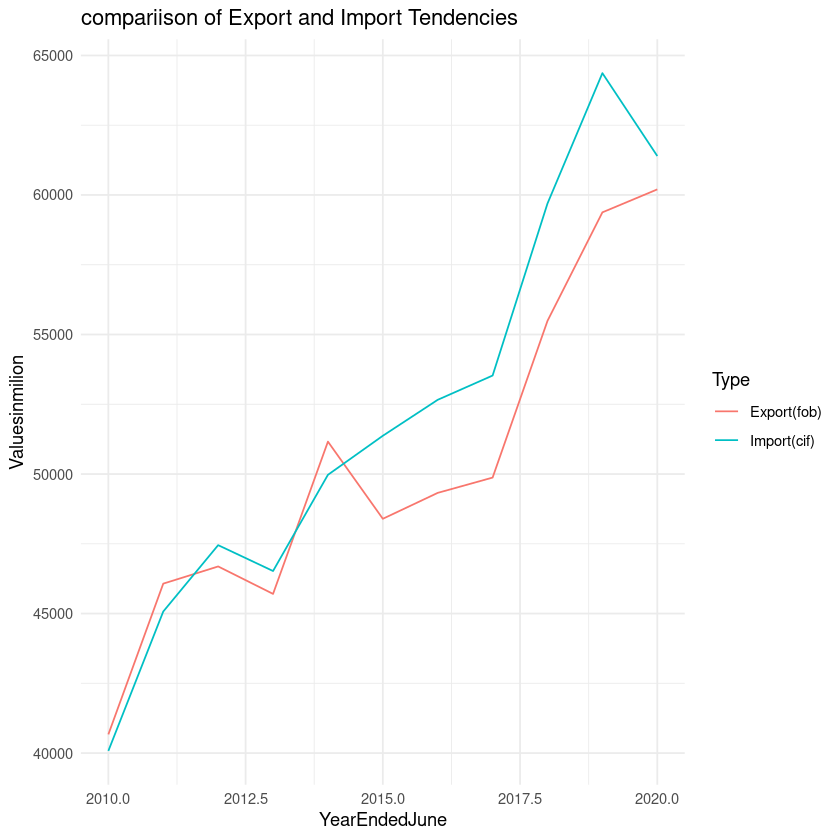

In [9]:
ggplot(June_year_ended, aes(x =YearEndedJune, y=Valuesinmillion,group = Type, color=Type)) + 
geom_line() +
labs(title="compariison of Export and Import Tendencies",
     x="YearEndedJune",
     y="Valuesinmilion"
     )+
scale_fill_manual(values= c("Export(fob)"="green","Import(cif)"="blue"))+
theme_minimal()

In [10]:
library(tidyverse)
library(ggplot2)
library(readxl)

In [11]:
export <- read_excel("Newdata.xlsx", sheet=1)

In [12]:
historical <- subset(export, Year<=2018)

In [13]:
df2 <- historical %>% group_by(Country,ID) %>% summarise(Exports=mean(Exports),
                                                         Year="16-18",
                                                         .groups="drop") %>%
as.data.frame()

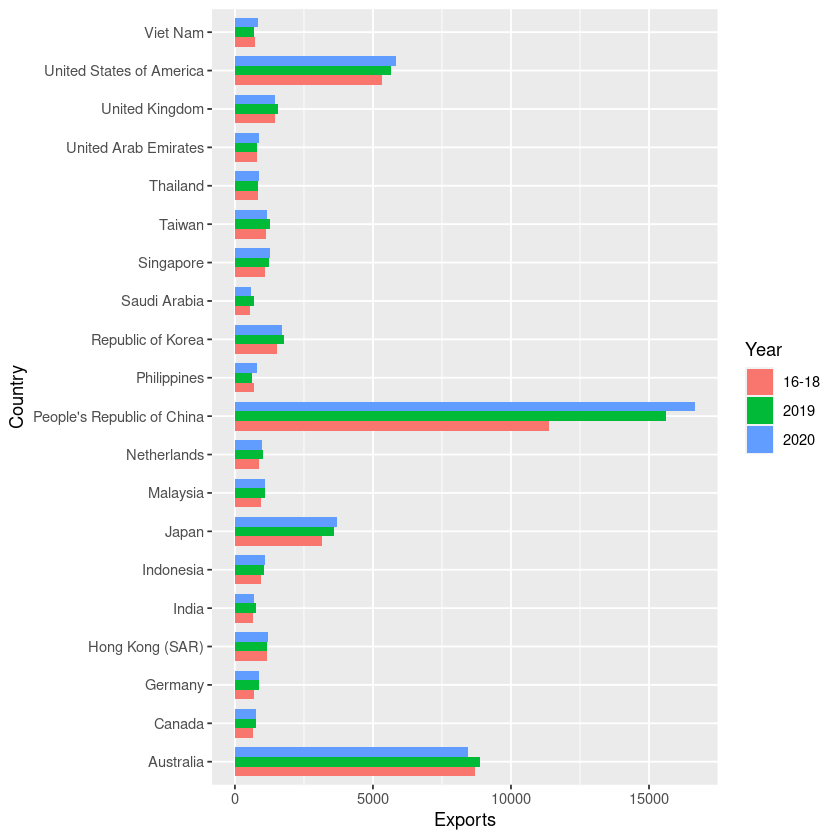

In [14]:
newdata<- rbind(subset(export, Year>2018),df2)
ggplot(newdata, aes(fill=Year, y=Exports,
                    x=Country))+
geom_bar(position="dodge",stat="identity",
         width=.75) + coord_flip()

In [15]:
#Import bar chart
import <- read_excel("Newdata.xlsx",sheet=2)
historical <-subset(import,Year <= 2018)

In [16]:
df3 <- historical %>% group_by(Country, ID) %>% summarise(Imports=mean(Imports),Year= "16-18",
                                                          .groups = "drop") %>% 
as.data.frame()

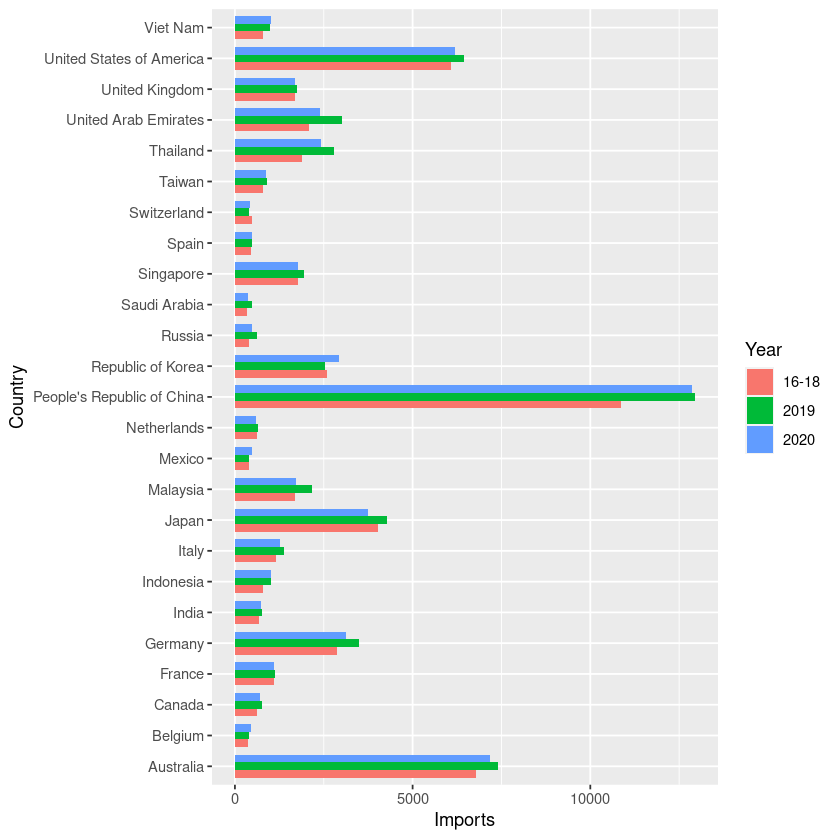

In [17]:
newdata2 <-rbind(subset(import, Year >2018),df3)
ggplot(newdata2, aes(fill=Year, y=Imports,
                     x=Country))+ 
geom_bar(position="dodge", stat="identity",
                width=.75) + coord_flip()

In [18]:
#Pie chart
pie <- read_excel("Newdata.xlsx", sheet=3)

In [19]:
#Gather all historical data between 2016 to 2018, calculate mean for each category
historical <- subset(pie, Year<=2018)
df <- historical %>% group_by(Categories) %>%
summarise(ExportQuantities=mean(ExportQuantities),
          Year = '16-18',
          .groups='drop')

In [20]:
#gather all data of 2019, calculate mean for each category
year2019 <- subset(pie,Year==2019)
df2<- year2019 %>% group_by(Categories) %>% 
summarise(ExportQuantities=mean(ExportQuantities),
          Year=2019,
          .groups='drop')

In [21]:
str(df)
str(df2)

tibble [6 × 3] (S3: tbl_df/tbl/data.frame)
 $ Categories      : chr [1:6] "Aluminium and aluminium articles" "Crude oil" "Fruit" "Meat and edible offal" ...
 $ ExportQuantities: num [1:6] 30.2 86.3 75 73.2 249.3 ...
 $ Year            : chr [1:6] "16-18" "16-18" "16-18" "16-18" ...
tibble [6 × 3] (S3: tbl_df/tbl/data.frame)
 $ Categories      : chr [1:6] "Aluminium and aluminium articles" "Crude oil" "Fruit" "Meat and edible offal" ...
 $ ExportQuantities: num [1:6] 32.7 72.5 77.9 78.1 266.3 ...
 $ Year            : num [1:6] 2019 2019 2019 2019 2019 ...


In [22]:
names(df)

[1] "Categories"       "ExportQuantities" "Year"

In [23]:
names(df2)

[1] "Categories"       "ExportQuantities" "Year"

In [24]:
newdata<-rbind(df,df2)

In [25]:
##Gather all data of 2020, calculate mean for each category
year2020 <- subset(pie, Year==2020)
df3<- year2020 %>% group_by(Categories) %>%
summarise(ExportQuantities=mean(ExportQuantities),
          Year=2020,
          .groups='drop')
newdata<-rbind(newdata,df3)

Saving 6.67 x 6.67 in image


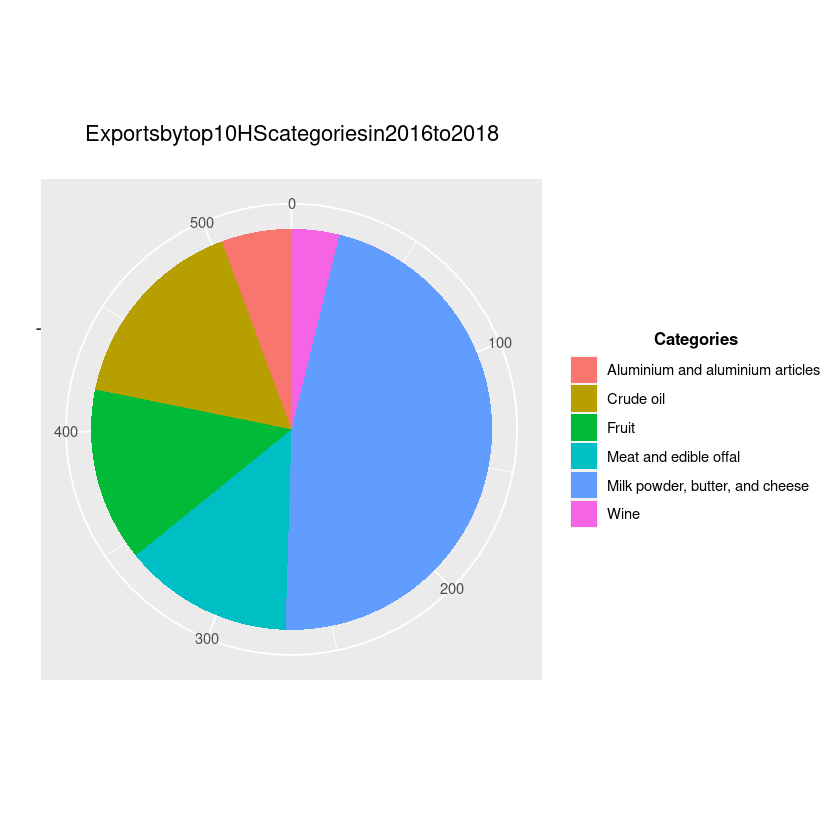

In [26]:
#Draw the three pie charts using above datasets 
plot1<-ggplot(subset(newdata, Year=='16-18'),
              aes(x="", y=ExportQuantities, fill=Categories))+
geom_bar(width=1,stat="identity")+
coord_polar(theta="y",start=0)+
labs(x="",y="",title="Exportsbytop10HScategoriesin2016to2018\n")+
theme(plot.title=element_text(hjust=0.5),
      legend.title=element_text(hjust=0.5,
      face="bold", size=10))
print(plot1)
ggsave("plot1.png")

Saving 6.67 x 6.67 in image


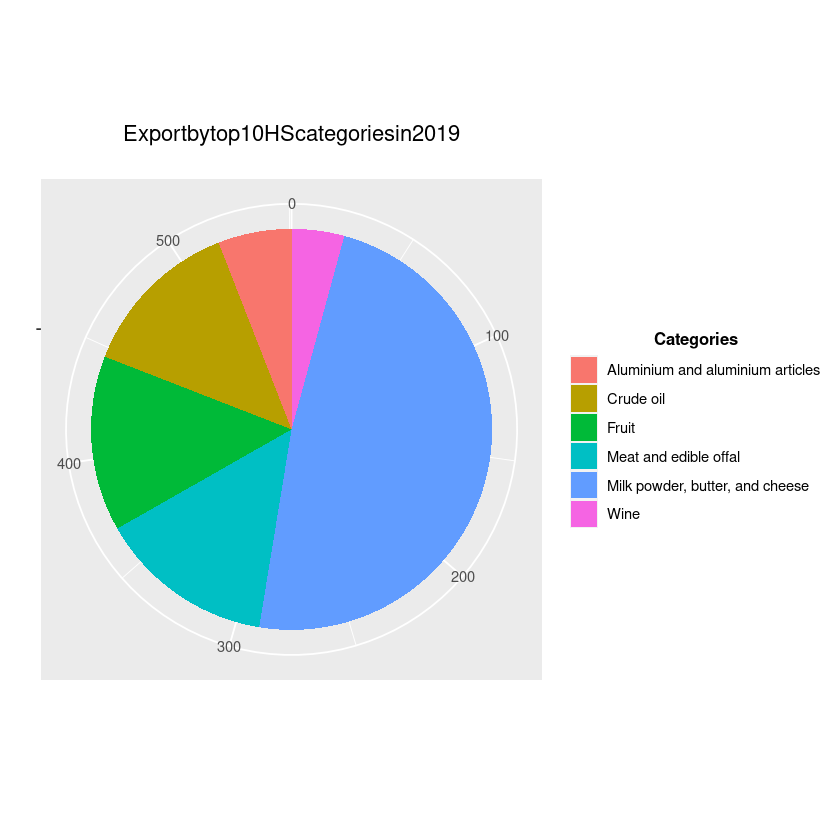

In [27]:
plot2<-ggplot(subset(newdata,Year==2019),aes(x="",
                                           y=ExportQuantities, fill=Categories))+
geom_bar(width =1, stat="identity")+
coord_polar(theta ="y", start = 0)+
labs(x="", y="", title ="Exportbytop10HScategoriesin2019\n")+
theme(plot.title=element_text(hjust=0.5),
      legend.title=element_text(hjust=0.5,
                                face="bold",
                                size=10))
print(plot2)
ggsave("plot2.png")

Saving 6.67 x 6.67 in image


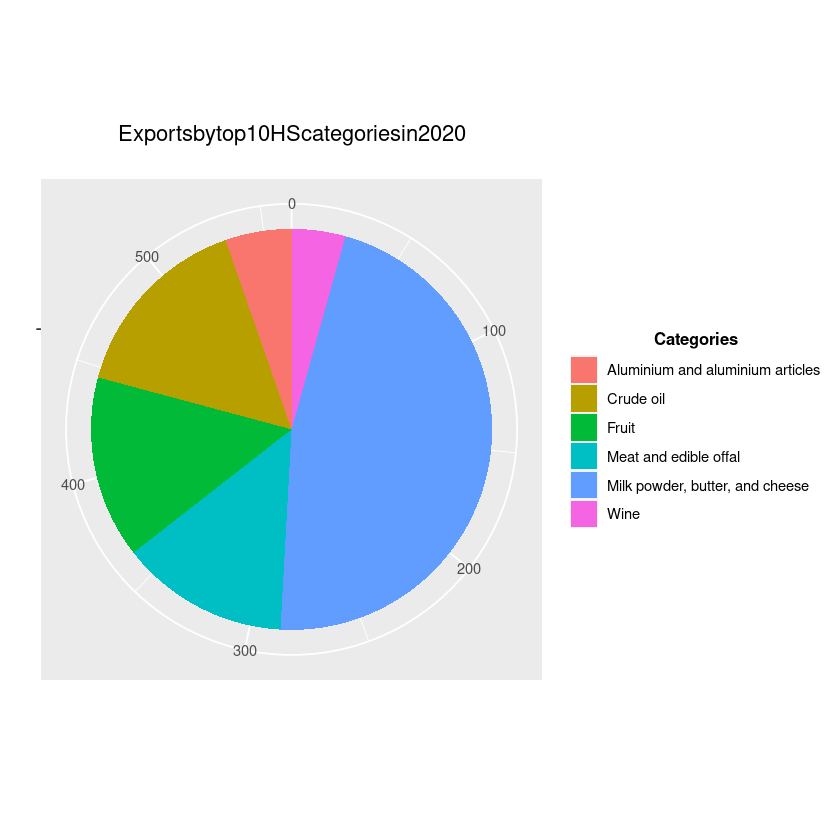

In [28]:
plot3<-ggplot(subset(newdata,Year==2020), aes(x="",
                                              y=ExportQuantities, fill= Categories))+
geom_bar(width=1,stat="identity")+
coord_polar(theta="y", start=0)+
labs(x="",y="",title="Exportsbytop10HScategoriesin2020\n")+
theme(plot.title=element_text(hjust=0.5),
      legend.title=element_text(hjust=0.5,
                                face="bold",size=10))
print(plot3)
ggsave("plot3.png")

Saving 6.67 x 6.67 in image


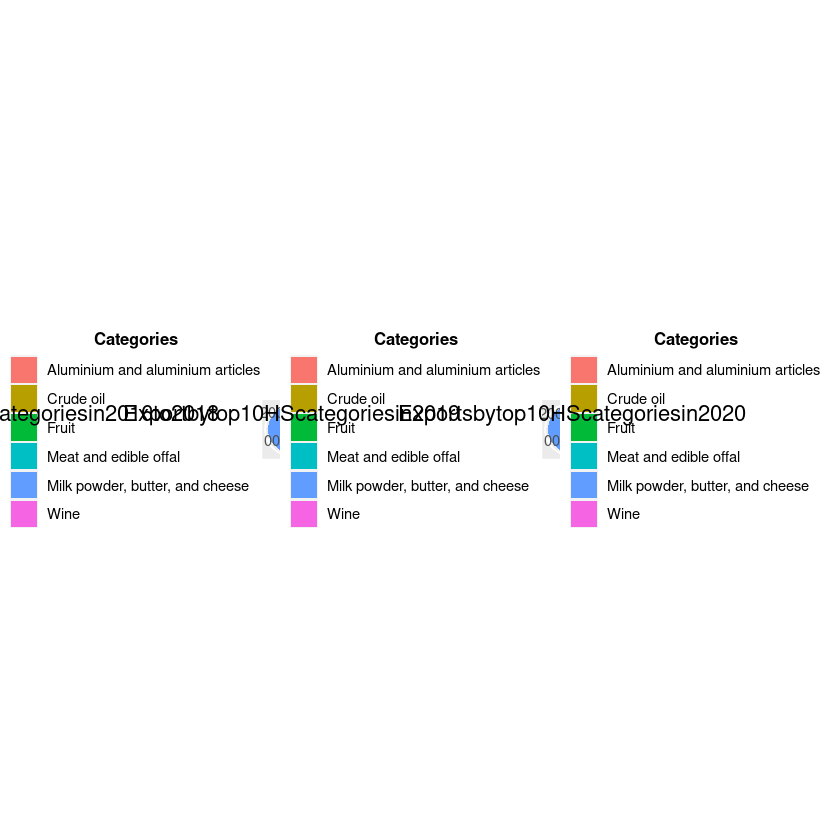

In [29]:
#Use grid.arrange to put plots in columns
plot<-grid.arrange(plot1,plot2,plot3,ncol=3)
ggsave("image.png")